# First we need to read the image data in .mat fileand cover it with loadmat to an array stored in hsi

In [3]:
from scipy.io import loadmat
pref_mat = loadmat('PaviaU.mat')
im_array = pref_mat['paviaU'] # this is an array of the hyperspectral cube
print (f'the array cube has a shape of : {im_array.shape}')

the array cube has a shape of : (610, 340, 103)


## This is another image with the .lan type file extantion. 
## To open the file we need the spectral library

In [4]:
from spectral import *
im_spectral = open_image('92AV3C.lan')
im_spectral = im_spectral.load()# when loading it returns an image file 
print (f'the spectral cube has a shape of : {im_spectral.shape}')

the spectral cube has a shape of : (145, 145, 220)


## We can also open the file using Numpy's memmap function but we still need to specify the shape of the file, otherwise thearray willhave a 1D shape.

In [5]:
import numpy as np
im_spectral_2 = np.memmap('92AV3C.lan', shape=im_spectral.shape)
im_spectral_2.shape


(145, 145, 220)

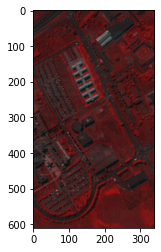

In [6]:
view = imshow(im_array, (102, 0,0)) # we can give the vieuw the intensity of (R,G,B) that would be displayed

* A better way to display it is by selecting the appropriate band. The image is composed of (hight, width, spectral band), and plotting with, for ex, pyplot

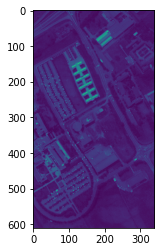

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(im_array[:,:,6])


### Or for better interaction use plotly express

In [8]:
import plotly.express as px
fig = px.imshow(im_array[:,:,1],color_continuous_scale='gray')
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()


In [71]:
import numpy as np
from matplotlib import cm
''' we need a function to calculate the normalized distribution of the hyperpectral image'''
def normalize(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    darr = arr_max - arr_min 
    return ((arr-arr_min)/(darr))*255



from mpl_toolkits.mplot3d import Axes3D

def make_ax(grid=False): # TO NOT DO THIS EVERYTIME 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

ax = make_ax(True)
ax.voxels(im_array[:,:,0:1], edgecolors='gray', shade=False)
plt.show()

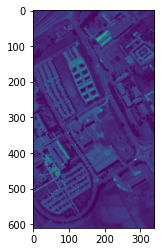

In [10]:
import os 
def previous_slice():
    pass

def next_slice():
    pass

def process_key(event):
    if event.key == 'p':
        previous_slice()
    elif event.key == 'n':
        next_slice()
fig, ax = plt.subplots()
ax.imshow(im_array[:,:, 43])
fig.canvas.mpl_connect('key_press_event', process_key)

def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[2] // 2
    ax.imshow(volume[:,:,ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'p':
        previous_slice(ax)
    elif event.key == 'n':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[2]  # wrap around using %
    ax.images[0].set_array(volume[:,:,ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[2]
    ax.images[0].set_array(volume[:,:,ax.index])

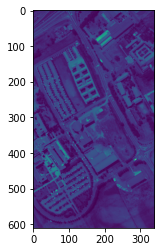

In [11]:

multi_slice_viewer(im_array)



In [12]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'p', 'n'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[2] // 2
    ax.imshow(volume[:,:,ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'p':
        previous_slice(ax)
    elif event.key == 'n':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[2]  # wrap around using %
    ax.images[0].set_array(volume[:,:,ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[2]
    ax.images[0].set_array(volume[:,:,ax.index])

# Normalize to get a grayscale image

In [75]:
from PIL import Image
im = Image.fromarray(normalize(im_array[:,:,5]))
px.imshow(im)

In [88]:
import cv2
i = 0
images = []
video = cv2.VideoWriter('test_video', 0, 1, (im_array.shape[1],im_array.shape[0]))
while i< im_array.shape[2]:
    image =np.array(normalize(im_array[:,:,i]), dtype=np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    video.write(image)
    i = i+1
video.release()